# <center>Yeezus Sentiment Analysis - Part 2</center>

## Part 2: Visualizations
#### WordCloud:
This library basically takes words from a list and randomly places them in a cool looking visualization. The size of each word is based on frequency, so by looking at the visualization you can really get a feel of what the data set looks like. I'm going to make a positive and negative wordcloud and evaluate the differences and similarities.
#### matplotlib.pyplot:
This library allows me to make bar graphs to show the usage of positive and negative words tweeted by kanye

#### sklearn
I used the countvectorizer function from the scikit-learn library. This helps me create a matrix of token counts from a collection of words and then I use the method "fit" to learn a vocabulary dictionary of all tokens in the matrix.

In [1]:
import datetime
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from dateutil import parser

import re

from nltk.corpus import stopwords
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
import nltk

from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

from sklearn.feature_extraction.text import CountVectorizer


#### Read cleaned_data to a df

In [2]:
csv = 'cleaned_kanye_tweets.csv'
df = pd.read_csv(csv,index_col=0)
print('-----------------General Info-----------------')
print(df.info())
df.head()

-----------------General Info-----------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 966 entries, 0 to 1169
Data columns (total 5 columns):
tweet_id           966 non-null int64
date               966 non-null object
original_tweets    966 non-null object
cleaned_tweets     966 non-null object
sentiment          966 non-null int64
dtypes: int64(2), object(3)
memory usage: 45.3+ KB
None


,tweet_id,date,original_tweets,cleaned_tweets,sentiment
0,1080212949464043520,2019-01-01,One of my favorite of many things about what t...,one of my favorite of many things about what t...,1
1,1080211582955663360,2019-01-01,Spoke with Joe Rogan Podcast coming soon🔥🔥🔥,spoke with joe rogan podcast coming soon,0
2,1080209800846176256,2019-01-01,From now on I’m performing with my mutherfucki...,from now on performing with my mutherfucking h...,0
4,1080206642040340481,2019-01-01,Love everyone Start the year clean J...,love everyone sta the year clean just be all love,1
5,1080206417523429376,2019-01-01,RT @yetaughtni: Honestly felt like the TL need...,honestly felt like the tl needed this words of...,1


### Determine Sentiment Distrubtion

In [3]:
neg_tweets = df[df.sentiment == -1]
print('-----------------Negative Sentiment-----------------')
print(neg_tweets.info())

neutral_tweets = df[df.sentiment == 0]
print('-----------------Neutral Sentiment-----------------')
print(neutral_tweets.info())

pos_tweets = df[df.sentiment == 1]
print('-----------------Positive Sentiment-----------------')
print(pos_tweets.info())

-----------------Negative Sentiment-----------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 21 to 1157
Data columns (total 5 columns):
tweet_id           101 non-null int64
date               101 non-null object
original_tweets    101 non-null object
cleaned_tweets     101 non-null object
sentiment          101 non-null int64
dtypes: int64(2), object(3)
memory usage: 4.7+ KB
None
-----------------Neutral Sentiment-----------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 502 entries, 1 to 1167
Data columns (total 5 columns):
tweet_id           502 non-null int64
date               502 non-null object
original_tweets    502 non-null object
cleaned_tweets     502 non-null object
sentiment          502 non-null int64
dtypes: int64(2), object(3)
memory usage: 23.5+ KB
None
-----------------Positive Sentiment-----------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 363 entries, 0 to 1169
Data columns (total 5 columns):
tweet_id           363 non-nu

### WordCloud
I inputted all the negative text into a list called "neg_string" and then generated a wordcloud. I repeated these steps with the positive text.

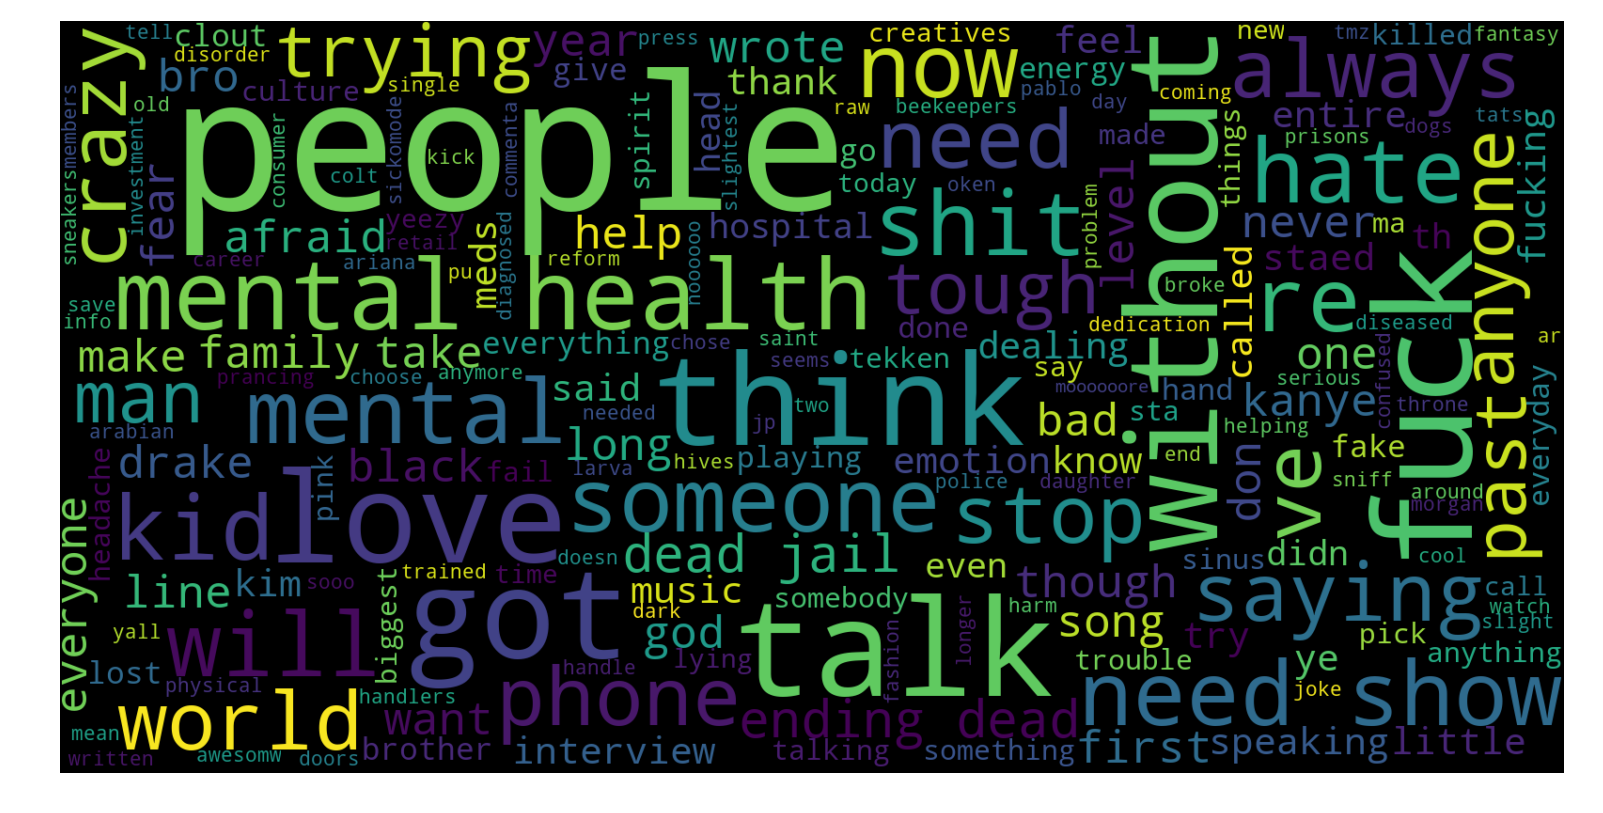

In [4]:
neg_string = []
for t in neg_tweets.cleaned_tweets:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### I'm confused why love is in the negative word list
I will print some of the "negative" tweets that involved "love" in them

In [5]:
print('- Negative Tweets From Kanye that contain the word "love" -')
print("--------------------------------------------------------------------------------------")
counter = 1
for t in neg_tweets.cleaned_tweets[:200]:
    if 'love' in t:
        print (str(counter) + ") " + t)
        counter=counter+1
print("--------------------------------------------------------------------------------------")

- Negative Tweets From Kanye that contain the word "love" -
--------------------------------------------------------------------------------------
1) if drake would go at ye that there is interviews that he loves me then he doesn give fuck about anyone
2) ve never been about beef about love lines were crossed and it not good for anyone so this is dead now
3) just think of someone you hate and try saying even to yourself that you love that person
4) though hate is similar emotion to love hate is not the answer love is
5) you do not have to agree with trump but the mob can not make me not love him we are both dragon energy he is my brot
--------------------------------------------------------------------------------------


### Kanye's tweets are so "interesting" that even ML can't seem to figure them out...."dragon energy"
Alright, so it's fairly hard to decipher the sentiment value by just reading these tweets but I can confidently deduce tweet 1 and 2 are correctly negative. Tweet 3 and 4 seem rather positive but I can understand why it was considered "negative" with the use of the word "hate". Now tweet 5 is probably the most Kanye tweet I've ever seen.
#### Let's try positive tweets

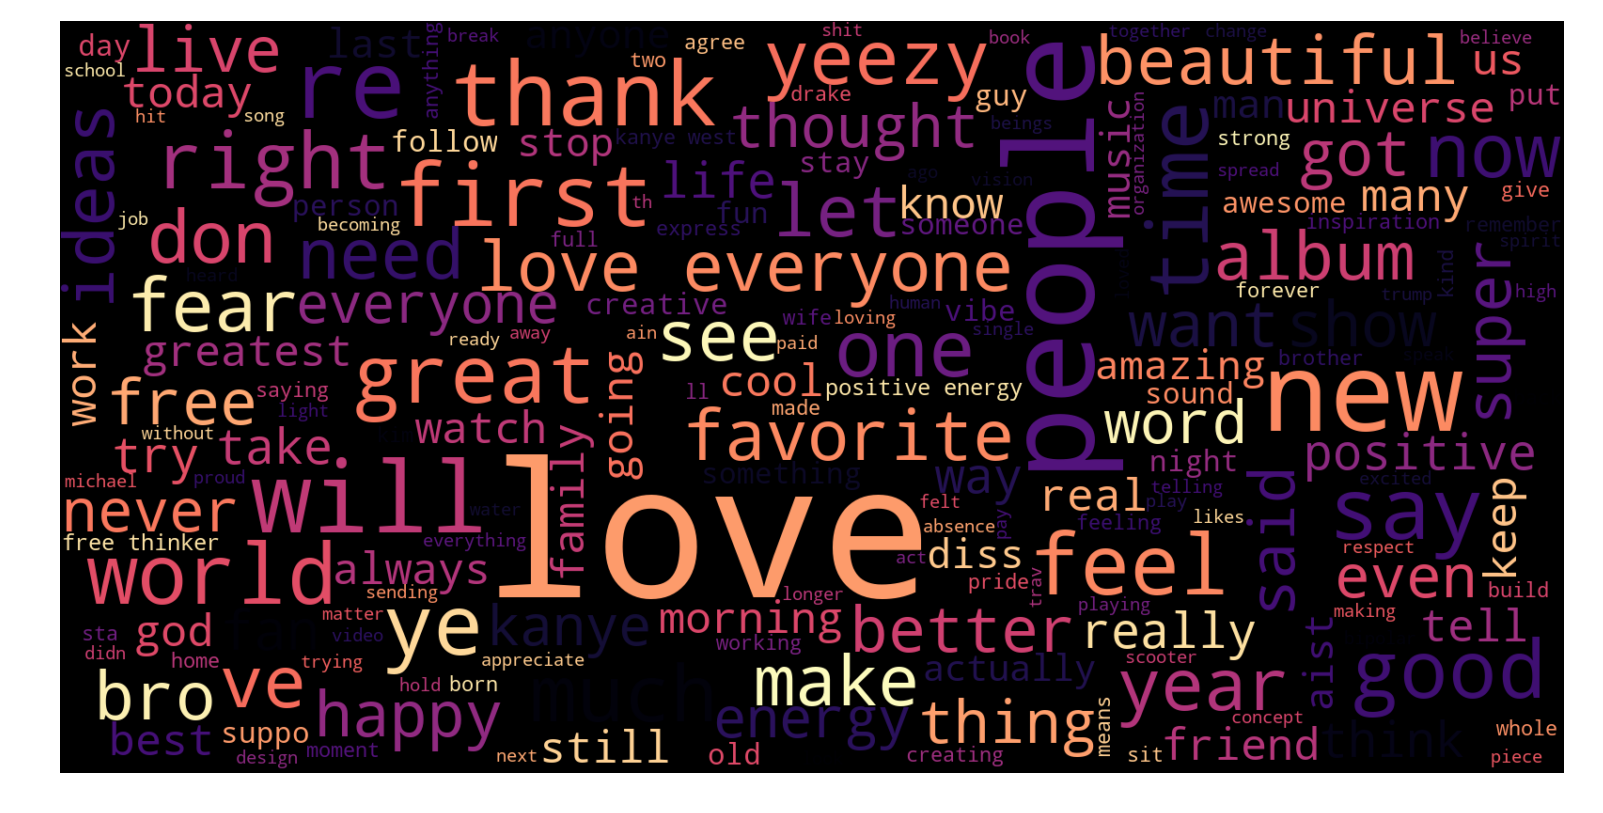

In [6]:
pos_tweets = df[df.sentiment == 1]
pos_string = []
for t in pos_tweets.cleaned_tweets:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600,
height=800, max_font_size=200,colormap='magma').generate(pos_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [7]:
print('- Positive Tweets From Kanye that contain the word "diss" -')
print("--------------------------------------------------------------------------------------")
counter = 1
for t in pos_tweets.cleaned_tweets[:200]:
    if 'diss' in t:
        print (str(counter) + ") " + t)
        counter=counter+1
print("--------------------------------------------------------------------------------------")

- Positive Tweets From Kanye that contain the word "diss" -
--------------------------------------------------------------------------------------
1) or it cool if it diss record because it more enteaining ima break all codes ain taking advice from
2) love everybody all positive energy no one that is musician should ever diss me my existence is for the rights of all aist
3) all positive energy got love for everyone just don sneak diss or diss at all paid the dues for all weirdos
4) heard drake had more bars dissing me that were removed
--------------------------------------------------------------------------------------


#### The 4th tweet proves ML still has a long ways to go before it can understand that "throwing shade" is  considered negative.

### Now I will convert the collection of text to a matrix of token (word) counts and remove "Stop Words"
Stop words = Stop words are words like “and”, “the”, “him”, which are presumed to be uninformative in representing the content of a text, and which may be removed to avoid them being construed as signal for prediction



In [8]:
cvec = CountVectorizer(stop_words='english', max_features=10000)
cvec.fit(df.cleaned_tweets)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=10000, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

### Term Frequency Table
The term frequency table is created by transforming the data with the fitted count vectorizer and then retrieved directly from the sparse matrix.

Represented below is the top 10 most used words

In [9]:
neg_doc_matrix = cvec.transform(df[df.sentiment == -1].cleaned_tweets)
pos_doc_matrix = cvec.transform(df[df.sentiment == 1].cleaned_tweets)
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()
term_freq_df.columns = ['negative', 'positive']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

,negative,positive,total
love,5,124,129
people,15,34,49
just,10,31,41
new,1,27,28
like,4,24,28
world,4,16,20
say,2,15,17
thank,2,15,17
ve,4,12,16
good,1,15,16


### Bar Graph of Top 50 Words in Negative Tweets

Text(0.5, 1.0, 'Top 50 Words in Negative Tweets')

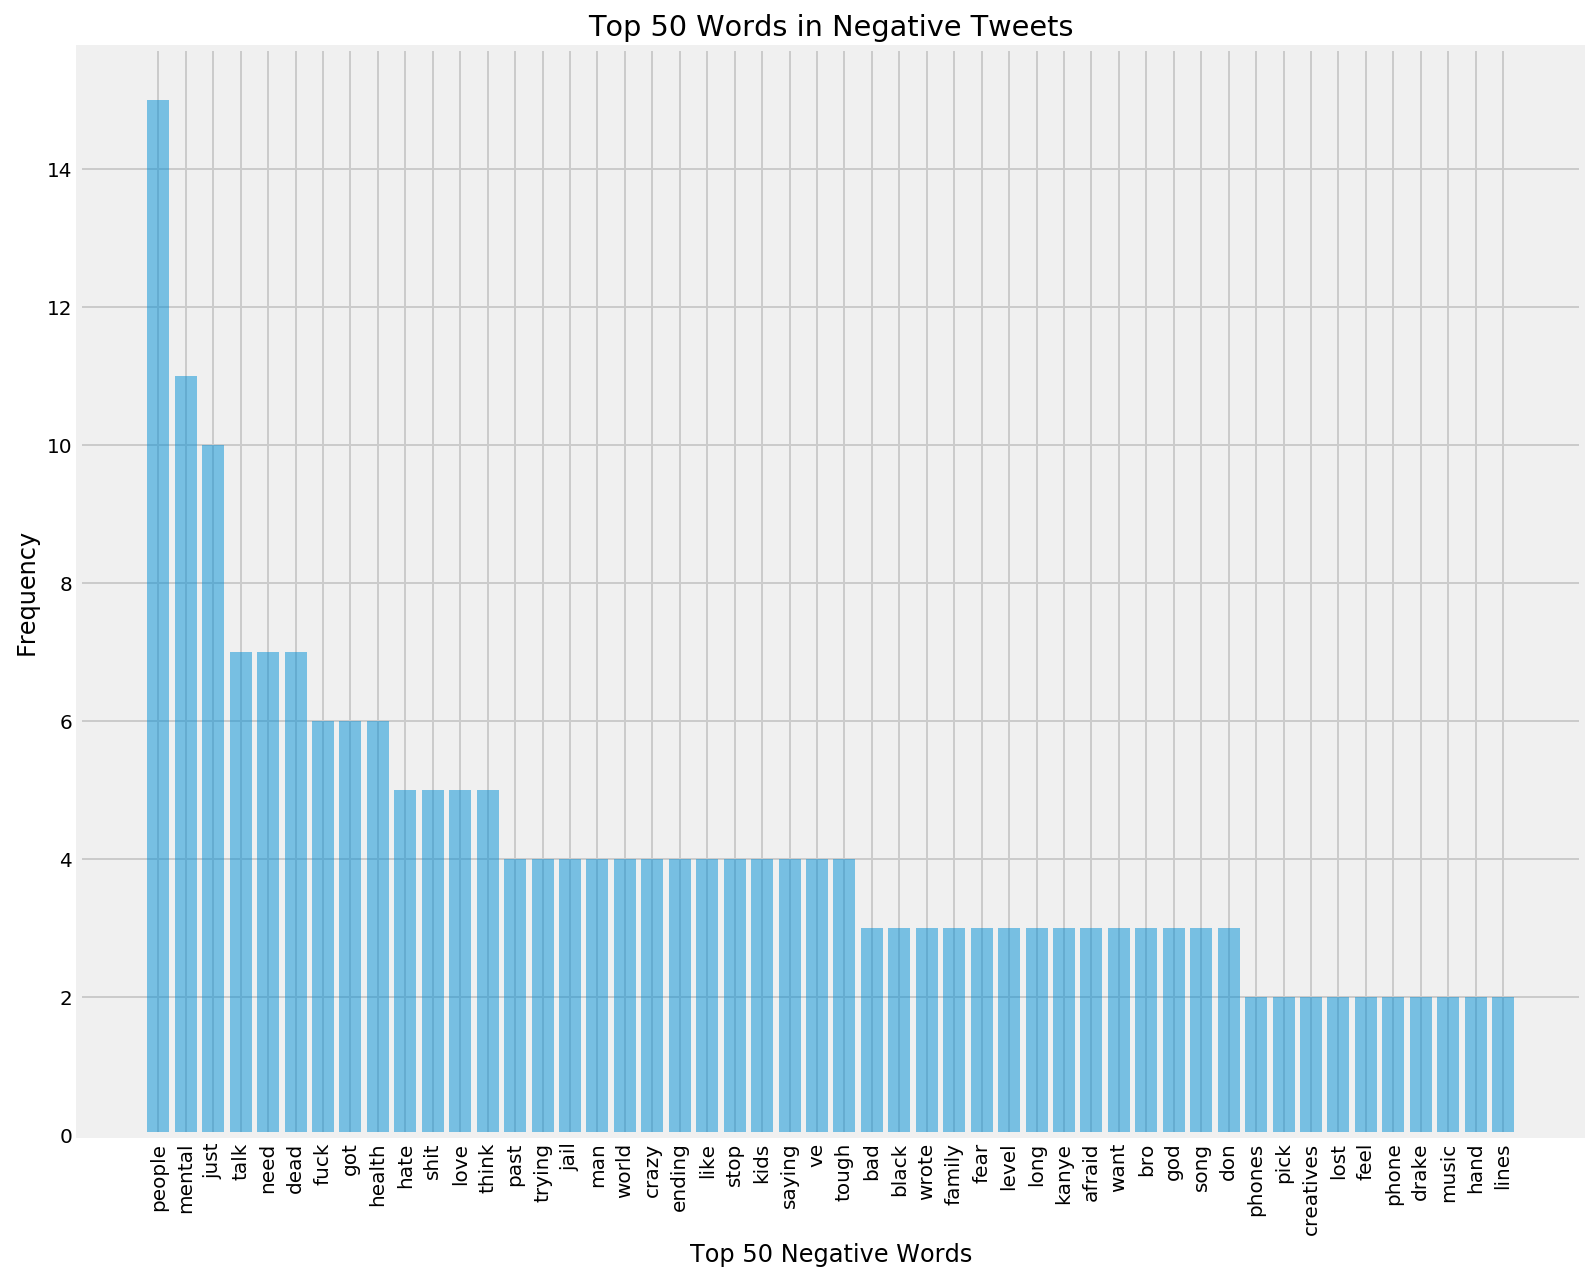

In [10]:
## Top 50 Negative Words Bar graph 
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df.sort_values(by='negative', ascending=False)['negative'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='negative', ascending=False)['negative'][:50].index, rotation='vertical')

plt.ylabel('Frequency')
plt.xlabel('Top 50 Negative Words')
plt.title('Top 50 Words in Negative Tweets')


### Bar Graph of Top 50 Words in Positive Tweets

Text(0.5, 1.0, 'Top 50 Words in positive Tweets')

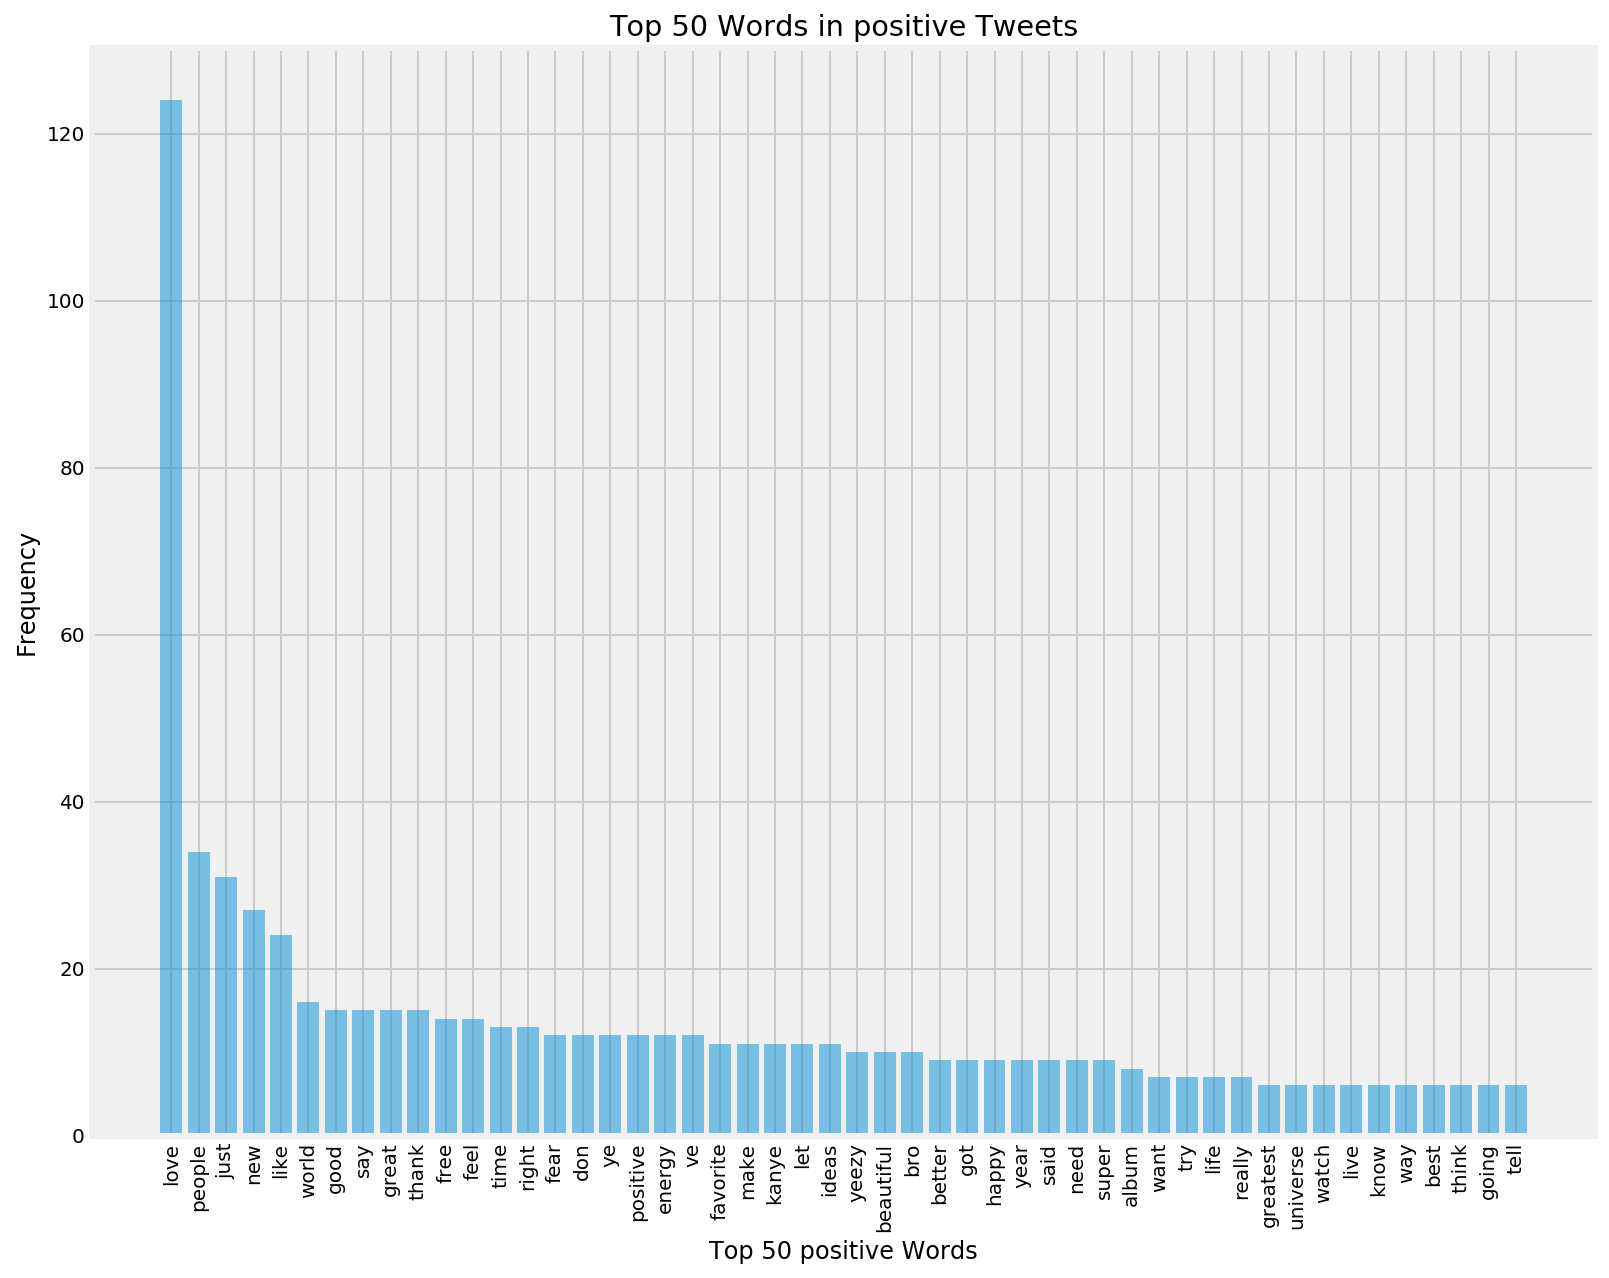

In [11]:
## Top 50 Positive Words Bar graph 
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df.sort_values(by='positive', ascending=False)['positive'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='positive', ascending=False)['positive'][:50].index, rotation='vertical')

plt.ylabel('Frequency')
plt.xlabel('Top 50 positive Words')
plt.title('Top 50 Words in positive Tweets')